In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# 1. Load CSV
df = pd.read_csv("Chennai houseing sale.csv")  # Use your actual CSV path


In [7]:
# Convert to datetime
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'], dayfirst=True)
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'], dayfirst=True)

# Calculate age at the time of sale
df['AGE'] = df['DATE_SALE'].dt.year - df['DATE_BUILD'].dt.year


In [10]:
def clean_column(col, corrections):
    return col.str.strip().replace(corrections)


In [11]:
# AREA
df['AREA'] = clean_column(df['AREA'], {
    'Adyr': 'Adyar',
    'Ana Nagar': 'Anna Nagar',
    'Chormpet': 'Chrompet',
    'Karapakam': 'Karapakkam',
    'Velchery': 'Velachery'
})

# SALE_COND
df['SALE_COND'] = clean_column(df['SALE_COND'], {
    'PartiaLl': 'Partial',
    'Partiall': 'Partial',
    'Adj Land': 'AdjLand'
})

# Similarly clean PARK_FACIL, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE


In [12]:
df['QS_OVERALL'] = df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())
df['N_BEDROOM'] = df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0])
df['N_BATHROOM'] = df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0])


In [13]:
categorical_cols = ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=False)


In [14]:
numeric_cols = [
    'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
    'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
    'REG_FEE', 'AGE'
]


In [15]:
X = pd.concat([df[numeric_cols], df_encoded], axis=1)
y = df['SALES_PRICE']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
y_pred = model.predict(X_test)


R² Score: 0.9591901647252374
MSE: 536135257711.0116
RMSE: 732212.5768593514


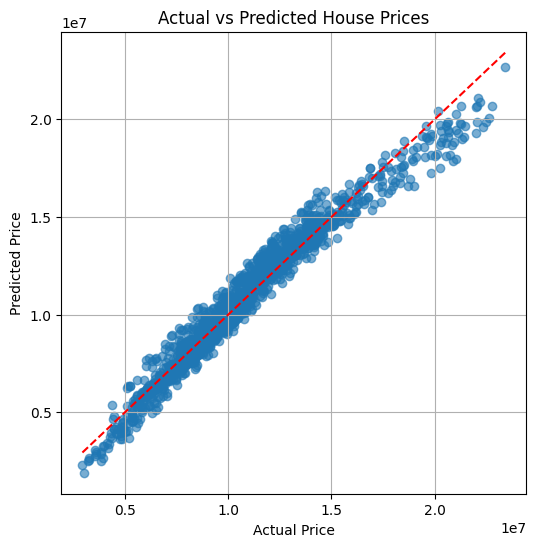

In [20]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

from math import sqrt

rmse = sqrt(mse)
print("RMSE:", rmse)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


In [21]:
import pickle

with open("house_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("model_features.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)
